In [104]:
#Including the libraries
import tensorflow as tf
from keras.applications import VGG16
from keras.models import Model
from keras import layers
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.utils import load_img
import xlsxwriter
from sklearn.svm import SVC
import itertools


In [214]:
train_samples_file = pd.read_excel('train_samples.xlsx')
test_samples_file = pd.read_excel('test_samples.xlsx')

print(train_samples_file.head())

   micrograph_id              path  micron_bar micron_bar_units  \
0              2   micrograph2.tif          10               um   
1              6   micrograph6.tif          20               um   
2             10  micrograph10.png          10               um   
3             11  micrograph11.tif          10               um   
4             29  micrograph29.tif          20               um   

   micron_bar_px magnification detector  sample_key  contributor_key  \
0            103         1964X       SE        18.0                2   
1            124         1178X       SE        29.0                2   
2            103         1964X       SE        39.0                2   
3            103         1964X       SE        18.0                2   
4            154         1473X       SE        35.0                2   

  primary_microconstituent  label  
0              spheroidite      1  
1              spheroidite      1  
2              spheroidite      1  
3              spher

In [3]:
train_samples_file.columns

Index(['micrograph_id', 'path', 'micron_bar', 'micron_bar_units',
       'micron_bar_px', 'magnification', 'detector', 'sample_key',
       'contributor_key', 'primary_microconstituent'],
      dtype='object')

In [27]:
training_photos = train_samples_file[column := 'path']
list(training_photos)
len(training_photos)

360

In [28]:
test_photos = test_samples_file[column := 'path']
list(test_photos)
len(test_photos)

431

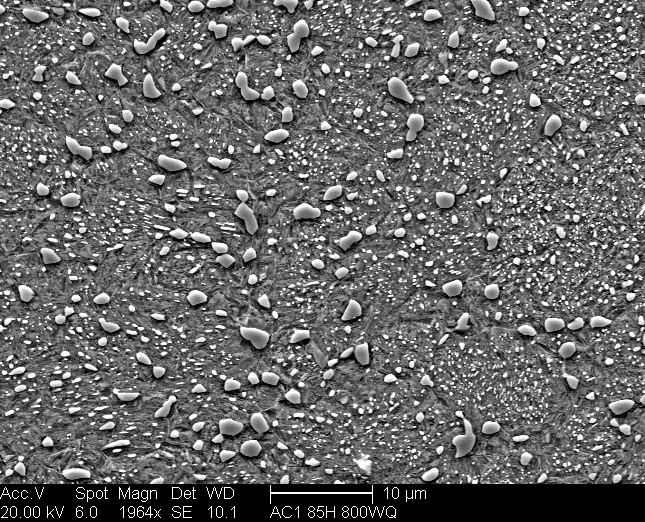

In [162]:
full_images[0]

In [8]:
full_images = []
cropped_img = []
for i in range(len(training_photos)):
    img = tf.keras.preprocessing.image.load_img(training_photos[i])
    full_images.append(img)
    x = tf.keras.preprocessing.image.img_to_array(img)
    x = x[0:484,:,:]
    x = np.expand_dims(x,axis = 0)
    x = preprocess_input(x)
    cropped_img.append(x)


In [29]:
full_images_test = []
cropped_img_test = []
for i in range(len(test_photos)):
    img = tf.keras.preprocessing.image.load_img(test_photos[i])
    full_images_test.append(img)
    x = tf.keras.preprocessing.image.img_to_array(img)
    x = x[0:484,:,:]
    x = np.expand_dims(x,axis = 0)
    x = preprocess_input(x)
    cropped_img_test.append(x)


In [15]:
# Importing model and defining the architecture
base_model = VGG16(weights = 'imagenet', include_top = False, input_shape = (484,645,3))
base_model.trainable = False
Different_Models = ['block1_pool', 'block2_pool', 'block3_pool','block4_pool','block5_pool']
model1 = Model(inputs = base_model.input, outputs = base_model.get_layer(Different_Models[0]).output)
model2 = Model(inputs = base_model.input, outputs = base_model.get_layer(Different_Models[1]).output)
model3 = Model(inputs = base_model.input, outputs = base_model.get_layer(Different_Models[2]).output)
model4 = Model(inputs = base_model.input, outputs = base_model.get_layer(Different_Models[3]).output)
model5 = Model(inputs = base_model.input, outputs = base_model.get_layer(Different_Models[4]).output)
print(model1.summary())
print(model2.summary())
print(model3.summary())
print(model4.summary())
print(model5.summary())

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 484, 645, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 484, 645, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 484, 645, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 242, 322, 64)      0         
                                                                 
Total params: 38,720
Trainable params: 0
Non-trainable params: 38,720
_________________________________________________________________
None
Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(

 block4_conv1 (Conv2D)       (None, 60, 80, 512)       1180160   
                                                                 
 block4_conv2 (Conv2D)       (None, 60, 80, 512)       2359808   
                                                                 
 block4_conv3 (Conv2D)       (None, 60, 80, 512)       2359808   
                                                                 
 block4_pool (MaxPooling2D)  (None, 30, 40, 512)       0         
                                                                 
 block5_conv1 (Conv2D)       (None, 30, 40, 512)       2359808   
                                                                 
 block5_conv2 (Conv2D)       (None, 30, 40, 512)       2359808   
                                                                 
 block5_conv3 (Conv2D)       (None, 30, 40, 512)       2359808   
                                                                 
 block5_pool (MaxPooling2D)  (None, 15, 20, 512)       0         
          

In [19]:
#Tranining for Models
feature_vector_64 = []
feature_vector_128 = []
feature_vector_256 = []
feature_vector_512 = []
feature_vector_512_b = []
for i in range(len(cropped_img)):
    xb = model1.predict(cropped_img[i])
    F = np.mean(xb,axis=(0,1,2))
    feature_vector_64.append(F)
for i in range(len(cropped_img)):
    xb = model2.predict(cropped_img[i])
    F = np.mean(xb,axis=(0,1,2))
    feature_vector_128.append(F)
for i in range(len(cropped_img)):
    xb = model3.predict(cropped_img[i])
    F = np.mean(xb,axis=(0,1,2))
    feature_vector_256.append(F)
for i in range(len(cropped_img)):
    xb = model4.predict(cropped_img[i])
    F = np.mean(xb,axis=(0,1,2))
    feature_vector_512.append(F)
for i in range(len(cropped_img)):
    xb = model5.predict(cropped_img[i])
    F = np.mean(xb,axis=(0,1,2))
    feature_vector_512_b.append(F)
   

1/1 [==============================] - 0s 103ms/step


1/1 [==============================] - 0s 115ms/step


1/1 [==============================] - 0s 235ms/step


1/1 [==============================] - 0s 235ms/step


1/1 [==============================] - 0s 430ms/step


1/1 [==============================] - 0s 436ms/step


1/1 [==============================] - 0s 437ms/step


1/1 [==============================] - 1s 587ms/step


1/1 [==============================] - 1s 582ms/step


1/1 [==============================] - 1s 685ms/step


1/1 [==============================] - 1s 661ms/step


1/1 [==============================] - 1s 667ms/step


In [30]:
#Tranining for Models
fv_64 = []
fv_128 = []
fv_256 = []
fv_512 = []
fv_512_b = []
for i in range(len(cropped_img_test)):
    xb = model1.predict(cropped_img_test[i])
    F = np.mean(xb,axis=(0,1,2))
    fv_64.append(F)
for i in range(len(cropped_img_test)):
    xb = model2.predict(cropped_img_test[i])
    F = np.mean(xb,axis=(0,1,2))
    fv_128.append(F)
for i in range(len(cropped_img_test)):
    xb = model3.predict(cropped_img_test[i])
    F = np.mean(xb,axis=(0,1,2))
    fv_256.append(F)    
for i in range(len(cropped_img_test)):
    xb = model4.predict(cropped_img_test[i])
    F = np.mean(xb,axis=(0,1,2))
    fv_512.append(F)
for i in range(len(cropped_img_test)):
    xb = model5.predict(cropped_img_test[i])
    F = np.mean(xb,axis=(0,1,2))
    fv_512_b.append(F)
   

1/1 [==============================] - 0s 114ms/step


1/1 [==============================] - 0s 114ms/step


1/1 [==============================] - 0s 241ms/step


1/1 [==============================] - 0s 231ms/step


1/1 [==============================] - 0s 264ms/step


1/1 [==============================] - 0s 438ms/step


1/1 [==============================] - 0s 438ms/step


1/1 [==============================] - 0s 422ms/step


1/1 [==============================] - 1s 589ms/step


1/1 [==============================] - 1s 599ms/step


1/1 [==============================] - 1s 582ms/step


1/1 [==============================] - 1s 675ms/step


1/1 [==============================] - 1s 698ms/step


1/1 [==============================] - 1s 653ms/step


In [16]:
# #Single unit example of creating feature vector
# img = tf.keras.preprocessing.image.load_img('micrograph877.TIF')
# x = tf.keras.preprocessing.image.img_to_array(img)
# x = x[0:484,:,:]
# x = np.expand_dims(x,axis = 0)
# x.shape

(1, 484, 645, 3)

In [17]:
# model = Model(inputs = base_model.input, outputs= base_model.get_layer('block1_pool').output)
# xb = model.predict(x)

# F = np.mean(xb,axis=(0,1,2))

1/1 [==============================] - 0s 361ms/step


In [37]:
feature_vector_64

[array([4.5222186e+02, 2.3691466e+02, 1.6032465e+02, 1.6105873e+02,
        3.9133884e+02, 3.9109641e+02, 3.0950073e+02, 1.3942241e+02,
        4.0121524e+02, 1.9506558e+02, 5.0049054e+02, 1.2896162e+02,
        3.0757159e+02, 4.1717755e+02, 9.1025360e+01, 1.6052991e+02,
        3.7460519e+02, 4.6161896e+02, 1.3005347e+02, 2.0802299e+02,
        4.9295319e+02, 2.0596965e+02, 2.4342003e+02, 4.6475437e+01,
        1.9820465e+02, 1.4770685e+02, 4.3477814e+02, 3.9876660e+02,
        3.6351422e+02, 3.9771567e+02, 3.6524225e+02, 1.1338594e+02,
        3.0325024e+02, 3.2328842e+02, 2.9677029e+02, 2.2140863e+02,
        2.5206761e+02, 4.7781665e+02, 1.7326500e+02, 1.1879666e+02,
        3.9494778e+02, 2.9208405e+02, 2.9704803e+02, 3.5486407e+02,
        3.0595551e+02, 6.7105728e+01, 2.8154825e+02, 4.9916360e+02,
        2.2042722e+02, 3.0712900e+01, 4.9367261e+02, 1.3480286e+02,
        3.7086853e+02, 4.9908453e+02, 2.9817948e-01, 4.3643027e+02,
        4.1774487e+02, 3.1007056e+02, 3.7839514e

In [55]:
workbook = xlsxwriter.Workbook('fv_512_b.xlsx')
worksheet = workbook.add_worksheet()

row = 0
for i in range(len(fv_512_b)):
    for col, data in enumerate(fv_512_b):
        worksheet.write_column(row, col, data)

workbook.close()

In [63]:
# spheroidite = 1
# network = 2
# pearlite = 3
# spheroidite+widmanstatten = 4
train_labels = train_samples_file[column := 'label']
list(train_labels)
Y = train_labels

In [209]:
len(Y)

360

In [188]:
# Training SVM 100, 200 , 300 , 360  for 64 feature vector
clf = SVC(kernel = 'rbf',C = 1, gamma = 'auto')
X1_64 = []
X2_64 = []
X3_64 = []
X4_64 = []

X1_128 = []
X2_128 = []
X3_128 = []
X4_128 = []

X1_256 = []
X2_256 = []
X3_256 = []
X4_256 = []

X1_512 = []
X2_512 = []
X3_512 = []
X4_512 = []

X1_512_b = []
X2_512_b = []
X3_512_b = []
X4_512_b = []


Y1 = []
Y2 = []
Y3 = []
Y4 = []
#X and Y for label 1 and 2
for i in range(100): X1_64.append(feature_vector_64[i])
for i in range(100,200): X2_64.append(feature_vector_64[i])
for i in range(200,300): X3_64.append(feature_vector_64[i])
for i in range(300,360): X4_64.append(feature_vector_64[i])    

for i in range(100): X1_128.append(feature_vector_128[i])
for i in range(100,200): X2_128.append(feature_vector_128[i])
for i in range(200,300): X3_128.append(feature_vector_128[i])
for i in range(300,360): X4_128.append(feature_vector_128[i])    

for i in range(100): X1_256.append(feature_vector_256[i])
for i in range(100,200): X2_256.append(feature_vector_256[i])
for i in range(200,300): X3_256.append(feature_vector_256[i])
for i in range(300,360): X4_256.append(feature_vector_256[i])    
    
for i in range(100): X1_512.append(feature_vector_512[i])
for i in range(100,200): X2_512.append(feature_vector_512[i])
for i in range(200,300): X3_512.append(feature_vector_512[i])
for i in range(300,360): X4_512.append(feature_vector_512[i])    
    
for i in range(100): X1_512_b.append(feature_vector_512_b[i])
for i in range(100,200): X2_512_b.append(feature_vector_512_b[i])
for i in range(200,300): X3_512_b.append(feature_vector_512_b[i])
for i in range(300,360): X4_512_b.append(feature_vector_512_b[i])    
    
    
for i in range(100): Y1.append(Y[i])    
for i in range(100,200): Y2.append(Y[i])    
for i in range(200,300): Y3.append(Y[i]) 
for i in range(300,360): Y4.append(Y[i])
    
    

#clf.fit(feature_vector_64,Y)

In [221]:
# TEST DATA analysis for all feature vector
# Y12 is a test point
Y1_64 = []
Y2_64 = []
Y3_64 = []
Y4_64 = []

Y1_128 = []
Y2_128 = []
Y3_128 = []
Y4_128 = []

Y1_256 = []
Y2_256 = []
Y3_256 = []
Y4_256 = []

Y1_512 = []
Y2_512 = []
Y3_512 = []
Y4_512 = []

Y1_512_b = []
Y2_512_b = []
Y3_512_b = []
Y4_512_b = []


Y1 = []
Y2 = []
Y3 = []
Y4 = []
#Y and Y for label 1 and 2
for i in range(274): Y1_64.append(fv_64[i])
for i in range(274,386): Y2_64.append(fv_64[i])
for i in range(386,410): Y3_64.append(fv_64[i])
for i in range(410,431): Y4_64.append(fv_64[i])    

for i in range(274): Y1_128.append(fv_128[i])
for i in range(274,386): Y2_128.append(fv_128[i])
for i in range(386,410): Y3_128.append(fv_128[i])
for i in range(410,431): Y4_128.append(fv_128[i])    

for i in range(274): Y1_256.append(fv_256[i])
for i in range(274,386): Y2_256.append(fv_256[i])
for i in range(386,410): Y3_256.append(fv_256[i])
for i in range(410,431): Y4_256.append(fv_256[i])    
    
for i in range(274): Y1_512.append(fv_512[i])
for i in range(274,386): Y2_512.append(fv_512[i])
for i in range(386,410): Y3_512.append(fv_512[i])
for i in range(410,431): Y4_512.append(fv_512[i])    
    
for i in range(274): Y1_512_b.append(fv_512_b[i])
for i in range(274,386): Y2_512_b.append(fv_512_b[i])
for i in range(386,410): Y3_512_b.append(fv_512_b[i])
for i in range(410,431): Y4_512_b.append(fv_512_b[i])    


In [189]:
Y12 = Y1 + Y2
Y13 = Y1 + Y3
Y14 = Y1 + Y4
Y23 = Y2 + Y3
Y24 = Y2 + Y4
Y34 = Y3 + Y4

In [190]:
X12_64 = X1_64 + X2_64
X13_64 = X1_64 + X3_64
X14_64 = X1_64 + X4_64
X23_64 = X2_64 + X3_64
X24_64 = X2_64 + X4_64
X34_64 = X3_64 + X4_64

X12_128 = X1_128 + X2_128
X13_128 = X1_128 + X3_128
X14_128 = X1_128 + X4_128
X23_128 = X2_128 + X3_128
X24_128 = X2_128 + X4_128
X34_128 = X3_128 + X4_128

X12_256 = X1_256 + X2_256
X13_256 = X1_256 + X3_256
X14_256 = X1_256 + X4_256
X23_256 = X2_256 + X3_256
X24_256 = X2_256 + X4_256
X34_256 = X3_256 + X4_256

X12_512 = X1_512 + X2_512
X13_512 = X1_512 + X3_512
X14_512 = X1_512 + X4_512
X23_512 = X2_512 + X3_512
X24_512 = X2_512 + X4_512
X34_512 = X3_512 + X4_512

X12_512_b = X1_512_b + X2_512_b
X13_512_b = X1_512_b + X3_512_b
X14_512_b = X1_512_b + X4_512_b
X23_512_b = X2_512_b + X3_512_b
X24_512_b = X2_512_b + X4_512_b
X34_512_b = X3_512_b + X4_512_b

### Selecting the correspoding test data set



In [222]:
Y12_64 = Y1_64 + Y2_64
Y13_64 = Y1_64 + Y3_64
Y14_64 = Y1_64 + Y4_64
Y23_64 = Y2_64 + Y3_64
Y24_64 = Y2_64 + Y4_64
Y34_64 = Y3_64 + Y4_64

Y12_128 = Y1_128 + Y2_128
Y13_128 = Y1_128 + Y3_128
Y14_128 = Y1_128 + Y4_128
Y23_128 = Y2_128 + Y3_128
Y24_128 = Y2_128 + Y4_128
Y34_128 = Y3_128 + Y4_128

Y12_256 = Y1_256 + Y2_256
Y13_256 = Y1_256 + Y3_256
Y14_256 = Y1_256 + Y4_256
Y23_256 = Y2_256 + Y3_256
Y24_256 = Y2_256 + Y4_256
Y34_256 = Y3_256 + Y4_256

Y12_512 = Y1_512 + Y2_512
Y13_512 = Y1_512 + Y3_512
Y14_512 = Y1_512 + Y4_512
Y23_512 = Y2_512 + Y3_512
Y24_512 = Y2_512 + Y4_512
Y34_512 = Y3_512 + Y4_512

Y12_512_b = Y1_512_b + Y2_512_b
Y13_512_b = Y1_512_b + Y3_512_b
Y14_512_b = Y1_512_b + Y4_512_b
Y23_512_b = Y2_512_b + Y3_512_b
Y24_512_b = Y2_512_b + Y4_512_b
Y34_512_b = Y3_512_b + Y4_512_b

In [173]:
clf12_64 = SVC(kernel = 'rbf',C = 1.0, gamma = 'auto')

In [180]:
clf12_64.fit(X12_64,Y12)

SVC(gamma=0.1)

### 274 (1), 112 (2), 24 (3), 21 (4)
### 386 , 410, 431

In [186]:

pre = []
for i in range(431):
    J = []
    arr1 = fv_64[i]
    J.append(list(arr1))

    pre.append(clf12_64.predict(J))

In [204]:
# All the one vs one classifiers of 512_b
clf12_512_b = SVC(kernel = 'rbf',C = 1.0, gamma = 'auto')
clf13_512_b = SVC(kernel = 'rbf',C = 1.0, gamma = 'auto')
clf14_512_b = SVC(kernel = 'rbf',C = 1.0, gamma = 'auto')
clf23_512_b = SVC(kernel = 'rbf',C = 1.0, gamma = 'auto')
clf24_512_b = SVC(kernel = 'rbf',C = 1.0, gamma = 'auto')
clf34_512_b = SVC(kernel = 'rbf',C = 1.0, gamma = 'auto')

clf12_512_b.fit(X12_512_b,Y12)
clf13_512_b.fit(X13_512_b,Y13)
clf14_512_b.fit(X14_512_b,Y14)
clf23_512_b.fit(X23_512_b,Y23)
clf24_512_b.fit(X24_512_b,Y24)
clf34_512_b.fit(X34_512_b,Y34)


SVC(gamma='auto')

In [205]:
# All the one vs one classifiers of 512
clf12_512 = SVC(kernel = 'rbf',C = 1.0, gamma = 'auto')
clf13_512 = SVC(kernel = 'rbf',C = 1.0, gamma = 'auto')
clf14_512 = SVC(kernel = 'rbf',C = 1.0, gamma = 'auto')
clf23_512 = SVC(kernel = 'rbf',C = 1.0, gamma = 'auto')
clf24_512 = SVC(kernel = 'rbf',C = 1.0, gamma = 'auto')
clf34_512 = SVC(kernel = 'rbf',C = 1.0, gamma = 'auto')

clf12_512.fit(X12_512,Y12)
clf13_512.fit(X13_512,Y13)
clf14_512.fit(X14_512,Y14)
clf23_512.fit(X23_512,Y23)
clf24_512.fit(X24_512,Y24)
clf34_512.fit(X34_512,Y34)

SVC(gamma='auto')

In [206]:
# All the one vs one classifiers of 256
clf12_256 = SVC(kernel = 'rbf',C = 1.0, gamma = 'auto')
clf13_256 = SVC(kernel = 'rbf',C = 1.0, gamma = 'auto')
clf14_256 = SVC(kernel = 'rbf',C = 1.0, gamma = 'auto')
clf23_256 = SVC(kernel = 'rbf',C = 1.0, gamma = 'auto')
clf24_256 = SVC(kernel = 'rbf',C = 1.0, gamma = 'auto')
clf34_256 = SVC(kernel = 'rbf',C = 1.0, gamma = 'auto')

clf12_256.fit(X12_256,Y12)
clf13_256.fit(X13_256,Y13)
clf14_256.fit(X14_256,Y14)
clf23_256.fit(X23_256,Y23)
clf24_256.fit(X24_256,Y24)
clf34_256.fit(X34_256,Y34)

SVC(gamma='auto')

In [207]:
# All the one vs one classifiers of 128
clf12_128 = SVC(kernel = 'rbf',C = 1.0, gamma = 'auto')
clf13_128 = SVC(kernel = 'rbf',C = 1.0, gamma = 'auto')
clf14_128 = SVC(kernel = 'rbf',C = 1.0, gamma = 'auto')
clf23_128 = SVC(kernel = 'rbf',C = 1.0, gamma = 'auto')
clf24_128 = SVC(kernel = 'rbf',C = 1.0, gamma = 'auto')
clf34_128 = SVC(kernel = 'rbf',C = 1.0, gamma = 'auto')

clf12_128.fit(X12_128,Y12)
clf13_128.fit(X13_128,Y13)
clf14_128.fit(X14_128,Y14)
clf23_128.fit(X23_128,Y23)
clf24_128.fit(X24_128,Y24)
clf34_128.fit(X34_128,Y34)

SVC(gamma='auto')

In [208]:
# All the one vs one classifiers of 64
clf12_64 = SVC(kernel = 'rbf',C = 1.0, gamma = 'auto')
clf13_64 = SVC(kernel = 'rbf',C = 1.0, gamma = 'auto')
clf14_64 = SVC(kernel = 'rbf',C = 1.0, gamma = 'auto')
clf23_64 = SVC(kernel = 'rbf',C = 1.0, gamma = 'auto')
clf24_64 = SVC(kernel = 'rbf',C = 1.0, gamma = 'auto')
clf34_64 = SVC(kernel = 'rbf',C = 1.0, gamma = 'auto')

clf12_64.fit(X12_64,Y12)
clf13_64.fit(X13_64,Y13)
clf14_64.fit(X14_64,Y14)
clf23_64.fit(X23_64,Y23)
clf24_64.fit(X24_64,Y24)
clf34_64.fit(X34_64,Y34)

SVC(gamma='auto')

In [226]:
# Extracting the y labels of test data
test_labels = test_samples_file[column := 'label']
list(test_labels)
y_test = test_labels
y_test1 = []
y_test2 = []
y_test3 = []
y_test4 = []
for i in range(274): y_test1.append(y_test[i])
for i in range(274,386): y_test2.append(y_test[i])
for i in range(386,410): y_test3.append(y_test[i])
for i in range(410,431): y_test4.append(y_test[i])
 
  
y_test12 = y_test1 + y_test2
y_test13 = y_test1 + y_test3
y_test14 = y_test1 + y_test4
y_test23 = y_test2 + y_test3
y_test24 = y_test2 + y_test4
y_test34 = y_test3 + y_test4




In [245]:
#Multiclassifier for classifier with 64 features
pred12_64 = []
pred13_64 = []
pred14_64 = []
pred23_64 = []
pred24_64 = []
pred34_64 = []
for i in range(len(Y12_64)):
    J = []
    arr1 = Y12_64[i]
    J.append(list(arr1))
    pred12_64.append(clf12_64.predict(J))
for i in range(len(Y13_64)):
    J = []
    arr1 = Y13_64[i]
    J.append(list(arr1))

    pred13_64.append(clf13_64.predict(J))
for i in range(len(Y14_64)):
    J = []
    arr1 = Y14_64[i]
    J.append(list(arr1))

    pred14_64.append(clf14_64.predict(J))
for i in range(len(Y23_64)):
    J = []
    arr1 = Y23_64[i]
    J.append(list(arr1))

    pred23_64.append(clf23_64.predict(J))
for i in range(len(Y24_64)):
    J = []
    arr1 = Y24_64[i]
    J.append(list(arr1))

    pred24_64.append(clf24_64.predict(J))
for i in range(len(Y34_64)):
    J = []
    arr1 = Y34_64[i]
    J.append(list(arr1))

    pred34_64.append(clf34_64.predict(J))    
    
c12 = 0
for i in range(len(pred12_64)):
    if pred12_64[i] != y_test12[i]:
        c12 +=1
e12_64 = c12/(len(pred12_64))
c13 = 0
for i in range(len(pred13_64)):
    if pred13_64[i] != y_test13[i]:
        c13 +=1
e13_64 = c13/(len(pred13_64))
c14 = 0
for i in range(len(pred14_64)):
    if pred14_64[i] != y_test14[i]:
        c14 +=1
e14_64 = c14/(len(pred14_64))
c23 = 0
for i in range(len(pred23_64)):
    if pred23_64[i] != y_test23[i]:
        c23 +=1
e23_64 = c23/(len(pred23_64))
c24 = 0
for i in range(len(pred24_64)):
    if pred24_64[i] != y_test24[i]:
        c24 +=1
e24_64 = c24/(len(pred24_64))
c34 = 0
for i in range(len(pred34_64)):
    if pred34_64[i] != y_test34[i]:
        c34 +=1
e34_64 = c34/(len(pred34_64))
print(f' The error of one vs one classifier for 64 feature vector is e12_64 =  {e12_64}, e13_64 = {e13_64}, e14_64 = {e14_64}, e23_64 = {e23_64}, e24_64 = {e24_64}, e34_64 = {e34_64}')

 The error of one vs one classifier for 64 feature vector is e12_64 =  0.29015544041450775, e13_64 = 0.9060402684563759, e14_64 = 0.0711864406779661, e23_64 = 0.8235294117647058, e24_64 = 0.15789473684210525, e34_64 = 0.4666666666666667


In [246]:
#Multiclassifier for classifier with 128 features
pred12_128 = []
pred13_128 = []
pred14_128 = []
pred23_128 = []
pred24_128 = []
pred34_128 = []
for i in range(len(Y12_128)):
    J = []
    arr1 = Y12_128[i]
    J.append(list(arr1))
    pred12_128.append(clf12_128.predict(J))
for i in range(len(Y13_128)):
    J = []
    arr1 = Y13_128[i]
    J.append(list(arr1))

    pred13_128.append(clf13_128.predict(J))
for i in range(len(Y14_128)):
    J = []
    arr1 = Y14_128[i]
    J.append(list(arr1))

    pred14_128.append(clf14_128.predict(J))
for i in range(len(Y23_128)):
    J = []
    arr1 = Y23_128[i]
    J.append(list(arr1))

    pred23_128.append(clf23_128.predict(J))
for i in range(len(Y24_128)):
    J = []
    arr1 = Y24_128[i]
    J.append(list(arr1))

    pred24_128.append(clf24_128.predict(J))
for i in range(len(Y34_128)):
    J = []
    arr1 = Y34_128[i]
    J.append(list(arr1))

    pred34_128.append(clf34_128.predict(J))    
    
c12 = 0
for i in range(len(pred12_128)):
    if pred12_128[i] != y_test12[i]:
        c12 +=1
e12_128 = c12/(len(pred12_128))
c13 = 0
for i in range(len(pred13_128)):
    if pred13_128[i] != y_test13[i]:
        c13 +=1
e13_128 = c13/(len(pred13_128))
c14 = 0
for i in range(len(pred14_128)):
    if pred14_128[i] != y_test14[i]:
        c14 +=1
e14_128 = c14/(len(pred14_128))
c23 = 0
for i in range(len(pred23_128)):
    if pred23_128[i] != y_test23[i]:
        c23 +=1
e23_128 = c23/(len(pred23_128))
c24 = 0
for i in range(len(pred24_128)):
    if pred24_128[i] != y_test24[i]:
        c24 +=1
e24_128 = c24/(len(pred24_128))
c34 = 0
for i in range(len(pred34_128)):
    if pred34_128[i] != y_test34[i]:
        c34 +=1
e34_128 = c34/(len(pred34_128))
print(f' The error of one vs one classifier for 128 feature vector is e12_128 =  {e12_128}, e13_128 = {e13_128}, e14_128 = {e14_128}, e23_128 = {e23_128}, e24_128 = {e24_128}, e34_128 = {e34_128}')

 The error of one vs one classifier for 128 feature vector is e12_128 =  0.7098445595854922, e13_128 = 0.9194630872483222, e14_128 = 0.0711864406779661, e23_128 = 0.8235294117647058, e24_128 = 0.15789473684210525, e34_128 = 0.4666666666666667


In [247]:
#Multiclassifier for classifier with 256 features
pred12_256 = []
pred13_256 = []
pred14_256 = []
pred23_256 = []
pred24_256 = []
pred34_256 = []
for i in range(len(Y12_256)):
    J = []
    arr1 = Y12_256[i]
    J.append(list(arr1))
    pred12_256.append(clf12_256.predict(J))
for i in range(len(Y13_256)):
    J = []
    arr1 = Y13_256[i]
    J.append(list(arr1))

    pred13_256.append(clf13_256.predict(J))
for i in range(len(Y14_256)):
    J = []
    arr1 = Y14_256[i]
    J.append(list(arr1))

    pred14_256.append(clf14_256.predict(J))
for i in range(len(Y23_256)):
    J = []
    arr1 = Y23_256[i]
    J.append(list(arr1))

    pred23_256.append(clf23_256.predict(J))
for i in range(len(Y24_256)):
    J = []
    arr1 = Y24_256[i]
    J.append(list(arr1))

    pred24_256.append(clf24_256.predict(J))
for i in range(len(Y34_256)):
    J = []
    arr1 = Y34_256[i]
    J.append(list(arr1))

    pred34_256.append(clf34_256.predict(J))    
    
c12 = 0
for i in range(len(pred12_256)):
    if pred12_256[i] != y_test12[i]:
        c12 +=1
e12_256 = c12/(len(pred12_256))
c13 = 0
for i in range(len(pred13_256)):
    if pred13_256[i] != y_test13[i]:
        c13 +=1
e13_256 = c13/(len(pred13_256))
c14 = 0
for i in range(len(pred14_256)):
    if pred14_256[i] != y_test14[i]:
        c14 +=1
e14_256 = c14/(len(pred14_256))
c23 = 0
for i in range(len(pred23_256)):
    if pred23_256[i] != y_test23[i]:
        c23 +=1
e23_256 = c23/(len(pred23_256))
c24 = 0
for i in range(len(pred24_256)):
    if pred24_256[i] != y_test24[i]:
        c24 +=1
e24_256 = c24/(len(pred24_256))
c34 = 0
for i in range(len(pred34_256)):
    if pred34_256[i] != y_test34[i]:
        c34 +=1
e34_256 = c34/(len(pred34_256))
print(f' The error of one vs one classifier for 256 feature vector is e12_256 =  {e12_256}, e13_256 = {e13_256}, e14_256 = {e14_256}, e23_256 = {e23_256}, e24_256 = {e24_256}, e34_256 = {e34_256}')

 The error of one vs one classifier for 256 feature vector is e12_256 =  0.29015544041450775, e13_256 = 0.8959731543624161, e14_256 = 0.0711864406779661, e23_256 = 0.8235294117647058, e24_256 = 0.15789473684210525, e34_256 = 0.4666666666666667


In [248]:
#Multiclassifier for classifier with 512 features
pred12_512 = []
pred13_512 = []
pred14_512 = []
pred23_512 = []
pred24_512 = []
pred34_512 = []
for i in range(len(Y12_512)):
    J = []
    arr1 = Y12_512[i]
    J.append(list(arr1))
    pred12_512.append(clf12_512.predict(J))
for i in range(len(Y13_512)):
    J = []
    arr1 = Y13_512[i]
    J.append(list(arr1))

    pred13_512.append(clf13_512.predict(J))
for i in range(len(Y14_512)):
    J = []
    arr1 = Y14_512[i]
    J.append(list(arr1))

    pred14_512.append(clf14_512.predict(J))
for i in range(len(Y23_512)):
    J = []
    arr1 = Y23_512[i]
    J.append(list(arr1))

    pred23_512.append(clf23_512.predict(J))
for i in range(len(Y24_512)):
    J = []
    arr1 = Y24_512[i]
    J.append(list(arr1))

    pred24_512.append(clf24_512.predict(J))
for i in range(len(Y34_512)):
    J = []
    arr1 = Y34_512[i]
    J.append(list(arr1))

    pred34_512.append(clf34_512.predict(J))    
    
c12 = 0
for i in range(len(pred12_512)):
    if pred12_512[i] != y_test12[i]:
        c12 +=1
e12_512 = c12/(len(pred12_512))
c13 = 0
for i in range(len(pred13_512)):
    if pred13_512[i] != y_test13[i]:
        c13 +=1
e13_512 = c13/(len(pred13_512))
c14 = 0
for i in range(len(pred14_512)):
    if pred14_512[i] != y_test14[i]:
        c14 +=1
e14_512 = c14/(len(pred14_512))
c23 = 0
for i in range(len(pred23_512)):
    if pred23_512[i] != y_test23[i]:
        c23 +=1
e23_512 = c23/(len(pred23_512))
c24 = 0
for i in range(len(pred24_512)):
    if pred24_512[i] != y_test24[i]:
        c24 +=1
e24_512 = c24/(len(pred24_512))
c34 = 0
for i in range(len(pred34_512)):
    if pred34_512[i] != y_test34[i]:
        c34 +=1
e34_512 = c34/(len(pred34_512))
print(f' The error of one vs one classifier for 512 feature vector is e12_512 =  {e12_512}, e13_512 = {e13_512}, e14_512 = {e14_512}, e23_512 = {e23_512}, e24_512 = {e24_512}, e34_512 = {e34_512}')

 The error of one vs one classifier for 512 feature vector is e12_512 =  0.29015544041450775, e13_512 = 0.08053691275167785, e14_512 = 0.0711864406779661, e23_512 = 0.8235294117647058, e24_512 = 0.15789473684210525, e34_512 = 0.4666666666666667


In [249]:
#Multiclassifier for classifier with 512_b features
pred12_512_b = []
pred13_512_b = []
pred14_512_b = []
pred23_512_b = []
pred24_512_b = []
pred34_512_b = []
for i in range(len(Y12_512_b)):
    J = []
    arr1 = Y12_512_b[i]
    J.append(list(arr1))
    pred12_512_b.append(clf12_512_b.predict(J))
for i in range(len(Y13_512_b)):
    J = []
    arr1 = Y13_512_b[i]
    J.append(list(arr1))

    pred13_512_b.append(clf13_512_b.predict(J))
for i in range(len(Y14_512_b)):
    J = []
    arr1 = Y14_512_b[i]
    J.append(list(arr1))

    pred14_512_b.append(clf14_512_b.predict(J))
for i in range(len(Y23_512_b)):
    J = []
    arr1 = Y23_512_b[i]
    J.append(list(arr1))

    pred23_512_b.append(clf23_512_b.predict(J))
for i in range(len(Y24_512_b)):
    J = []
    arr1 = Y24_512_b[i]
    J.append(list(arr1))

    pred24_512_b.append(clf24_512_b.predict(J))
for i in range(len(Y34_512_b)):
    J = []
    arr1 = Y34_512_b[i]
    J.append(list(arr1))

    pred34_512_b.append(clf34_512_b.predict(J))    
    
c12 = 0
for i in range(len(pred12_512_b)):
    if pred12_512_b[i] != y_test12[i]:
        c12 +=1
e12_512_b = c12/(len(pred12_512_b))
c13 = 0
for i in range(len(pred13_512_b)):
    if pred13_512_b[i] != y_test13[i]:
        c13 +=1
e13_512_b = c13/(len(pred13_512_b))
c14 = 0
for i in range(len(pred14_512_b)):
    if pred14_512_b[i] != y_test14[i]:
        c14 +=1
e14_512_b = c14/(len(pred14_512_b))
c23 = 0
for i in range(len(pred23_512_b)):
    if pred23_512_b[i] != y_test23[i]:
        c23 +=1
e23_512_b = c23/(len(pred23_512_b))
c24 = 0
for i in range(len(pred24_512_b)):
    if pred24_512_b[i] != y_test24[i]:
        c24 +=1
e24_512_b = c24/(len(pred24_512_b))
c34 = 0
for i in range(len(pred34_512_b)):
    if pred34_512_b[i] != y_test34[i]:
        c34 +=1
e34_512_b = c34/(len(pred34_512_b))
print(f' The error of one vs one classifier for 512_b feature vector is e12_512_b =  {e12_512_b}, e13_512_b = {e13_512_b}, e14_512_b = {e14_512_b}, e23_512_b = {e23_512_b}, e24_512_b = {e24_512_b}, e34_512_b = {e34_512_b}')

 The error of one vs one classifier for 512_b feature vector is e12_512_b =  0.03367875647668394, e13_512_b = 0.0, e14_512_b = 0.061016949152542375, e23_512_b = 0.07352941176470588, e24_512_b = 0.06015037593984962, e34_512_b = 0.08888888888888889


In [258]:
# Multiclass classifier
#Multiclassifier for classifier with 64 features
pred_64 = []
pred12_64_m = []
pred13_64_m = []
pred14_64_m = []
pred23_64_m = []
pred24_64_m = []
pred34_64_m = []
for i in range(len(fv_64)):
    J = []
    arr1 = fv_64[i]
    J.append(list(arr1))
    pred12_64_m.append(clf12_64.predict(J))
    pred13_64_m.append(clf13_64.predict(J))
    pred14_64_m.append(clf14_64.predict(J))
    pred23_64_m.append(clf23_64.predict(J))
    pred24_64_m.append(clf24_64.predict(J))
    pred34_64_m.append(clf34_64.predict(J))  
for i in range(len(fv_64)):
    array = [pred12_64_m[i], pred13_64_m[i] , pred14_64_m[i] , pred23_64_m[i] , pred24_64_m[i] , pred34_64_m[i] ]    
    c1, c2 ,c3, c4 = 0,0,0,0
    for j in range(len(array)):
        if array[j] == 1:
            c1+=1
        if array[j] == 2:
            c2+=1
        if array[j] == 3:
            c3+=1
        if array[j] == 4:
            c4+=1  
        arr = [c1, c2, c3, c4]    
        label = arr.index(max(arr))
    pred_64.append(label + 1)
counter = 0
for i in range(len(fv_64)): 
    if pred_64[i] != y_test[i]:
        counter +=1
error_64 = counter/len(fv_64)
error_64    

0.9350348027842227

In [259]:
# Multiclass classifier
#Multiclassifier for classifier with 128 features
pred_128 = []
pred12_128_m = []
pred13_128_m = []
pred14_128_m = []
pred23_128_m = []
pred24_128_m = []
pred34_128_m = []
for i in range(len(fv_128)):
    J = []
    arr1 = fv_128[i]
    J.append(list(arr1))
    pred12_128_m.append(clf12_128.predict(J))
    pred13_128_m.append(clf13_128.predict(J))
    pred14_128_m.append(clf14_128.predict(J))
    pred23_128_m.append(clf23_128.predict(J))
    pred24_128_m.append(clf24_128.predict(J))
    pred34_128_m.append(clf34_128.predict(J))  
for i in range(len(fv_128)):
    array = [pred12_128_m[i], pred13_128_m[i] , pred14_128_m[i] , pred23_128_m[i] , pred24_128_m[i] , pred34_128_m[i] ]    
    c1, c2 ,c3, c4 = 0,0,0,0
    for j in range(len(array)):
        if array[j] == 1:
            c1+=1
        if array[j] == 2:
            c2+=1
        if array[j] == 3:
            c3+=1
        if array[j] == 4:
            c4+=1  
        arr = [c1, c2, c3, c4]    
        label = arr.index(max(arr))
    pred_128.append(label + 1)
counter = 0
for i in range(len(fv_128)): 
    if pred_128[i] != y_test[i]:
        counter +=1
error_128 = counter/len(fv_128)
error_128    

0.9443155452436195

In [260]:
# Multiclass classifier
#Multiclassifier for classifier with 256 features
pred_256 = []
pred12_256_m = []
pred13_256_m = []
pred14_256_m = []
pred23_256_m = []
pred24_256_m = []
pred34_256_m = []
for i in range(len(fv_256)):
    J = []
    arr1 = fv_256[i]
    J.append(list(arr1))
    pred12_256_m.append(clf12_256.predict(J))
    pred13_256_m.append(clf13_256.predict(J))
    pred14_256_m.append(clf14_256.predict(J))
    pred23_256_m.append(clf23_256.predict(J))
    pred24_256_m.append(clf24_256.predict(J))
    pred34_256_m.append(clf34_256.predict(J))  
for i in range(len(fv_256)):
    array = [pred12_256_m[i], pred13_256_m[i] , pred14_256_m[i] , pred23_256_m[i] , pred24_256_m[i] , pred34_256_m[i] ]    
    c1, c2 ,c3, c4 = 0,0,0,0
    for j in range(len(array)):
        if array[j] == 1:
            c1+=1
        if array[j] == 2:
            c2+=1
        if array[j] == 3:
            c3+=1
        if array[j] == 4:
            c4+=1  
        arr = [c1, c2, c3, c4]    
        label = arr.index(max(arr))
    pred_256.append(label + 1)
counter = 0
for i in range(len(fv_256)): 
    if pred_256[i] != y_test[i]:
        counter +=1
error_256 = counter/len(fv_256)
error_256    

0.9280742459396751

In [261]:
# Multiclass classifier
#Multiclassifier for classifier with 512 features
pred_512 = []
pred12_512_m = []
pred13_512_m = []
pred14_512_m = []
pred23_512_m = []
pred24_512_m = []
pred34_512_m = []
for i in range(len(fv_512)):
    J = []
    arr1 = fv_512[i]
    J.append(list(arr1))
    pred12_512_m.append(clf12_512.predict(J))
    pred13_512_m.append(clf13_512.predict(J))
    pred14_512_m.append(clf14_512.predict(J))
    pred23_512_m.append(clf23_512.predict(J))
    pred24_512_m.append(clf24_512.predict(J))
    pred34_512_m.append(clf34_512.predict(J))  
for i in range(len(fv_512)):
    array = [pred12_512_m[i], pred13_512_m[i] , pred14_512_m[i] , pred23_512_m[i] , pred24_512_m[i] , pred34_512_m[i] ]    
    c1, c2 ,c3, c4 = 0,0,0,0
    for j in range(len(array)):
        if array[j] == 1:
            c1+=1
        if array[j] == 2:
            c2+=1
        if array[j] == 3:
            c3+=1
        if array[j] == 4:
            c4+=1  
        arr = [c1, c2, c3, c4]    
        label = arr.index(max(arr))
    pred_512.append(label + 1)
counter = 0
for i in range(len(fv_512)): 
    if pred_512[i] != y_test[i]:
        counter +=1
error_512 = counter/len(fv_512)
error_512    

0.3642691415313225

In [262]:
# Multiclass classifier
#Multiclassifier for classifier with 512_b features
pred_512_b = []
pred12_512_b_m = []
pred13_512_b_m = []
pred14_512_b_m = []
pred23_512_b_m = []
pred24_512_b_m = []
pred34_512_b_m = []
for i in range(len(fv_512_b)):
    J = []
    arr1 = fv_512_b[i]
    J.append(list(arr1))
    pred12_512_b_m.append(clf12_512_b.predict(J))
    pred13_512_b_m.append(clf13_512_b.predict(J))
    pred14_512_b_m.append(clf14_512_b.predict(J))
    pred23_512_b_m.append(clf23_512_b.predict(J))
    pred24_512_b_m.append(clf24_512_b.predict(J))
    pred34_512_b_m.append(clf34_512_b.predict(J))  
for i in range(len(fv_512_b)):
    array = [pred12_512_b_m[i], pred13_512_b_m[i] , pred14_512_b_m[i] , pred23_512_b_m[i] , pred24_512_b_m[i] , pred34_512_b_m[i] ]    
    c1, c2 ,c3, c4 = 0,0,0,0
    for j in range(len(array)):
        if array[j] == 1:
            c1+=1
        if array[j] == 2:
            c2+=1
        if array[j] == 3:
            c3+=1
        if array[j] == 4:
            c4+=1  
        arr = [c1, c2, c3, c4]    
        label = arr.index(max(arr))
    pred_512_b.append(label + 1)
counter = 0
for i in range(len(fv_512_b)): 
    if pred_512_b[i] != y_test[i]:
        counter +=1
error_512_b = counter/len(fv_512_b)
error_512_b    

0.07192575406032482